In [1]:
!pip3 install pandas

In [2]:
!pip3 install prophet

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from datetime import datetime


In [6]:
weather_df = pd.read_csv("london_weather.csv")
weather_df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [7]:
weather_df['ds'] = pd.to_datetime(weather_df['date'], format='%Y%m%d')
weather_df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,ds
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1979-01-01
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1979-01-02
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1979-01-03
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,1979-01-04
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,1979-01-05


In [16]:
df_cloud_cover = weather_df[["ds","cloud_cover"]]
df_cloud_cover = df_cloud_cover.rename(columns = {"cloud_cover":"y"})
df_cloud_cover

,ds,y
0,1979-01-01,2.0
1,1979-01-02,6.0
2,1979-01-03,5.0
3,1979-01-04,8.0
4,1979-01-05,6.0
...,...,...
15336,2020-12-27,1.0
15337,2020-12-28,7.0
15338,2020-12-29,7.0
15339,2020-12-30,6.0


In [17]:
model_cloud_cover = Prophet()

In [18]:
model_cloud_cover.fit(df_sunshine)

14:33:53 - cmdstanpy - INFO - Chain [1] start processing
14:33:54 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
future_cloud_cover = model_cloud_cover.make_future_dataframe(periods=5, freq="Y")

In [20]:
forecast_cloud_cover = model_cloud_cover.predict(future_sunshine)

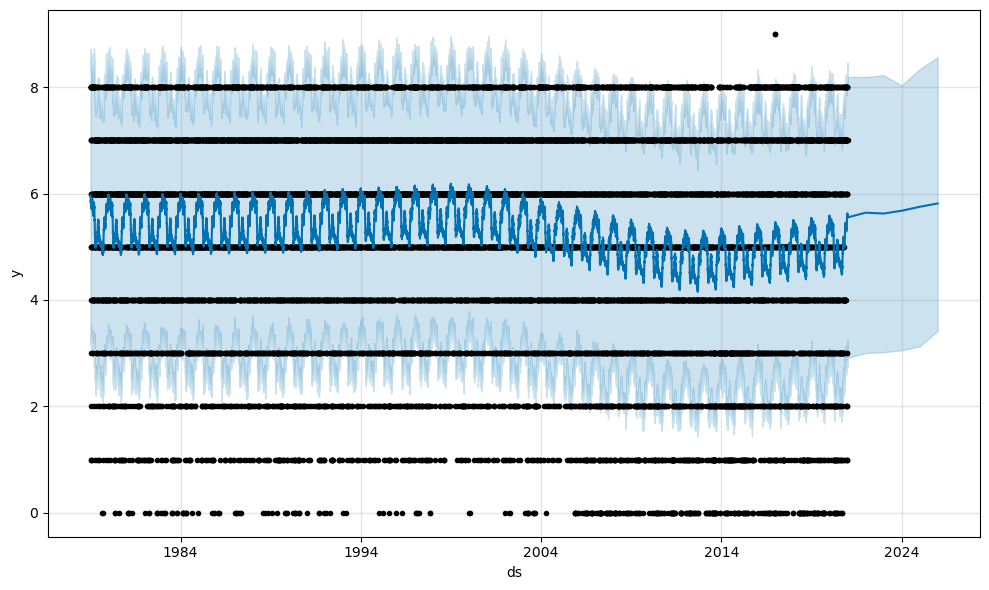

In [28]:
fig_cloud_cover = model_cloud_cover.plot(forecast_cloud_cover)

In [22]:
forecast_cloud_cover = forecast_cloud_cover.set_index("ds")
forecast_cloud_cover.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
1979-01-01,5.404365,3.391207,8.579476,5.404365,5.404365,0.561793,0.561793,0.561793,0.036870,0.036870,0.036870,0.524923,0.524923,0.524923,0.0,0.0,0.0,5.966158
1979-01-02,5.404377,3.145855,8.723401,5.404377,5.404377,0.526865,0.526865,0.526865,0.011002,0.011002,0.011002,0.515863,0.515863,0.515863,0.0,0.0,0.0,5.931242
1979-01-03,5.404389,3.464733,8.533654,5.404389,5.404389,0.537533,0.537533,0.537533,0.032689,0.032689,0.032689,0.504844,0.504844,0.504844,0.0,0.0,0.0,5.941923
1979-01-04,5.404401,3.522653,8.573383,5.404401,5.404401,0.461465,0.461465,0.461465,-0.030701,-0.030701,-0.030701,0.492166,0.492166,0.492166,0.0,0.0,0.0,5.865866
1979-01-05,5.404414,3.273875,8.622925,5.404414,5.404414,0.495609,0.495609,0.495609,0.017444,0.017444,0.017444,0.478166,0.478166,0.478166,0.0,0.0,0.0,5.900023


<Axes: xlabel='ds'>

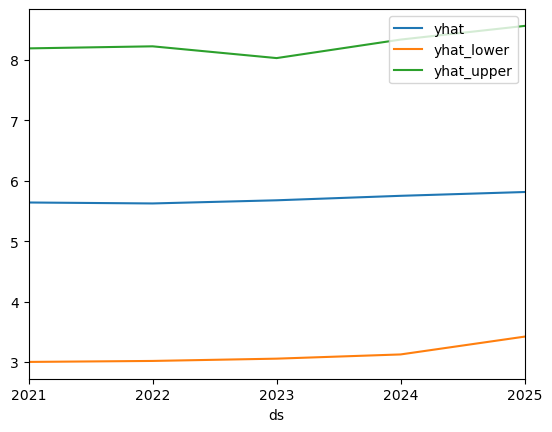

In [25]:
forecast_cloud_cover[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-5:,:].plot()

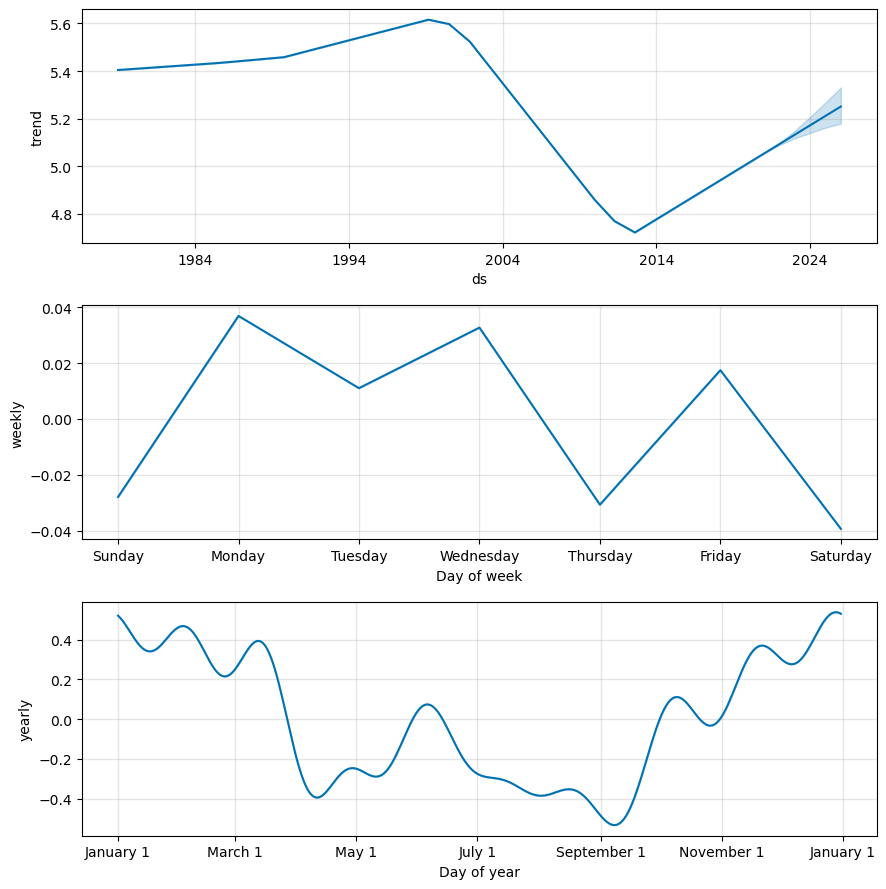

In [26]:
forecast_cloud_cover = forecast_cloud_cover.reset_index()
fig_cloud_cover_a = model_cloud_cover.plot_components(forecast_cloud_cover)

In [ ]:

# Load the energy consumption data
energy_df = pd.read_csv('path/to/london_energy_consumption_upload.csv')

# Convert date columns to datetime format for both dataframes
weather_df['date'] = pd.to_datetime(weather_df['date'])
energy_df['Date'] = pd.to_datetime(energy_df['Date'])

# Rename the date columns so they match, and we can merge dataframes on this column
weather_df.rename(columns={'date': 'Date'}, inplace=True)

# Merge the dataframes on the 'Date' column
merged_df = pd.merge(weather_df, energy_df, on='Date', how='inner')

# Check the first few rows to ensure it merged correctly
print(merged_df.head())



# Check for no NaN values that could skew the results
merged_df.dropna(subset=['Temperature', 'KWH'], inplace=True)

# Calculate the correlation
correlation_matrix = merged_df[['Temperature', 'KWH']].corr()
print(correlation_matrix)

#  Seaborn for a scatter plot

sns.scatterplot(data=merged_df, x='Temperature', y='KWH')
plt.title('Temperature vs. Energy Consumption')
plt.show()
